# Passing Axis to Functions

This notebook highlights the power of passing individual axis to functions.  We show two functions (`plot_mass_frac` and `plot_tau`) that accept an optional parameter `passed_ax`.  If a `matplotlib` axis is specified here, the plotting will be done on this axis and returned.  This is super useful if you want to make a single Figure with multiple combined panels.

In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
%matplotlib inline

Let's adjust some of the basic plotting parameters (ala the `Dos-n-Donts_py` notebook).

In [2]:
fontsize=18
plt.rc('text',usetex=True)
plt.rc('xtick',labelsize=fontsize)
plt.rc('ytick',labelsize=fontsize)
plt.rc('axes',labelsize=fontsize)
plt.rc('font',**{'family': 'serif','serif': ['Times']})
axis_width = 2
tickwidth = 2
major_ticklength = 6
minor_ticklength = 4

I couldn't do a notebook about plotting and not inject some of my own functions that I use to make my plots look B-E-A-utiful.

In [3]:
def adjust_axis(ax, axis_width, tickwidth, major_ticklength,
                minor_ticklength):
    """
    Adjusts the tick properties of the axis.  Sets the tick lengths, widths and
    also ensures that the ticks are pointing inwards.

    Parameters
    ----------

    ax : ``matplotlib`` axis. 
        The axis we're adjusting.

    axis_width, tickwidth : Floats.
        The desired width (or thickness) of the axis and ticks.

    major_ticklength, minor_ticklength : Floats.
        The desired length of the major and minor ticks.

    Returns
    ---------

    ax : ``matplotlib`` axis. 
        The axis with the properties adjusted.
    """

    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(axis_width)

    ax.tick_params(which = 'both', direction='in',
                   width = tickwidth)
    ax.tick_params(which = 'major',
                   length = major_ticklength)
    ax.tick_params(which = 'minor',
                   length = minor_ticklength)

    return ax

Time to generate some data that we will plot.  Normally this would be some actual, useful data but for now let's just generate some junk stuff.

In [4]:
def get_data(num_models, z):
    """
    Generates some data for plotting a number of models.

    Parameters
    ----------

    num_models : Integer.
        The number of models we will be plotting.

    z : List of floats. Length is ``num_models``.
        The redshift range we're generating data for.

    Returns
    ---------

    mass_frac_allmodels, tau_allmodels : 2D nested list of floats. Outer length is ``num_models``,
                                         inner length is ``len(z)``.
        The generated data for the two variables we are plotting. Currently just junk data.  
    """
    
    mass_frac_allmodels = []
    tau_allmodels = []

    for model_number in range(num_models):
        mass_frac_allmodels.append([])
        tau_allmodels.append([])
        for snapnum, redshift in enumerate(z):
            mass_frac_allmodels[model_number].append(snapnum + model_number*2)
            tau_allmodels[model_number].append(snapnum*(model_number+1)**2)

    return mass_frac_allmodels, tau_allmodels

In [5]:
num_models = 2
z = np.arange(6, 15, 0.5)
model_tags = ["Data1", "Data2"]

mass_frac_allmodels, tau_allmodels = get_data(num_models, z)

Now we have our data let's do some plotting.

In [6]:
def plot_mass_frac(z, mass_frac_allmodels, model_tags, passed_ax=None):
    """
    Plots the evolution of the mass fraction.

    Parameters
    ----------

    z : List of floats. Length is the number of models.
        The redshift range we're plotting over.
        
    mass_frac_allmodels : 2D nested list of floats. Outer length is the number of models,
                          inner length is ``len(z)``.
        The mass fraction at each redshift for each model.

    model_tags : List of strings.  Length is the number of models.
        The model entry that will be placed in the legend.
        
    passed_ax : ``matplotlib`` axes, optional
        If defined, the history will be plotted onto the passed axis and
        returned.  The figure will not be shown in the Notebook. 

    Returns
    ---------
    
    If ``passed_ax = None``, None. The figure is displayed in the Notebook.
    
    If ``passed_ax`` is passed, the axis is returned with the ionization
    history plotted.
    """
    
    # If we haven't passed an axis, set up a new Figure and axis object.
    if passed_ax:
        ax1 = passed_ax
    else:
        fig1 = plt.figure(figsize = (8,8))
        ax1 = fig1.add_subplot(111)

    # Go through each model and plot the data.
    for model_number in range(len(mass_frac_allmodels)):
        ax1.plot(z, mass_frac_allmodels[model_number], label=model_tags[model_number])
    
    # Make things look prettier.
    ax1.set_xlabel(r"$z$")
    ax1.set_ylabel(r"$\langle \chi_{HI}\rangle$")
    ax1 = adjust_axis(ax1, axis_width, tickwidth, major_ticklength, minor_ticklength)
    
    # If we're passing an axis, we will deal with putting the legends on later.
    if not passed_ax:
        leg = ax1.legend(loc='lower right', numpoints=1, labelspacing=0.1)
        leg.draw_frame(False)  # Don't want a box frame
        for t in leg.get_texts():  # Reduce the size of the text
            t.set_fontsize(fontsize)

    # If we passed an axis, return it. Otherwise, show the figure.
    if passed_ax:
        return ax1
    else:
        fig1.show()

In [7]:
def plot_tau(z, tau_allmodels, model_tags, passed_ax=None):
    """
    Plots the evolution of tau.

    Parameters
    ----------

    z : List of floats. Length is the number of models.
        The redshift range we're plotting over.
        
    tau_frac_allmodels : 2D nested list of floats. Outer length is the number of models,
                         inner length is ``len(z)``.
        The tau value at each redshift for each model.

    model_tags : List of strings.  Length is the number of models.
        The model entry that will be placed in the legend.
        
    passed_ax : ``matplotlib`` axes, optional
        If defined, the history will be plotted onto the passed axis and
        returned.  The figure will not be shown in the Notebook. 

    Returns
    ---------
    
    If ``passed_ax = None``, None. The figure is displayed in the Notebook.
    
    If ``passed_ax`` is passed, the axis is returned with the ionization
    history plotted.
    """
    
    # If we haven't passed an axis, set up a new Figure and axis object.
    if passed_ax:
        ax1 = passed_ax
    else:
        fig1 = plt.figure(figsize = (8,8))
        ax1 = fig1.add_subplot(111)
        
    # Go through each model and plot the data.
    for model_number in range(len(mass_frac_allmodels)):
        ax1.plot(z, tau_allmodels[model_number], label=model_tags[model_number])

    # Make things look pretty.
    ax1.set_xlabel(r"$z$")
    ax1.set_ylabel(r"$\tau$")
    ax1 = adjust_axis(ax1, axis_width, tickwidth, major_ticklength, minor_ticklength)

    # If we're passing an axis, we will deal with putting the legends on later.
    if not passed_ax:
        leg = ax1.legend(loc='lower right', numpoints=1, labelspacing=0.1)
        leg.draw_frame(False)  # Don't want a box frame
        for t in leg.get_texts():  # Reduce the size of the text
            t.set_fontsize(fontsize)

    # If we passed an axis, return it. Otherwise, show the figure.
    if passed_ax:
        return ax1
    else:
        fig1.show()

Okay now let's call each of these functions individually and see the Figures.

/Users/100921091/miniconda/envs/py3.6/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


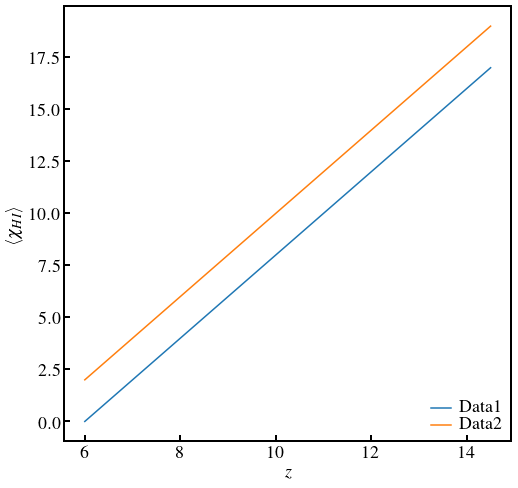

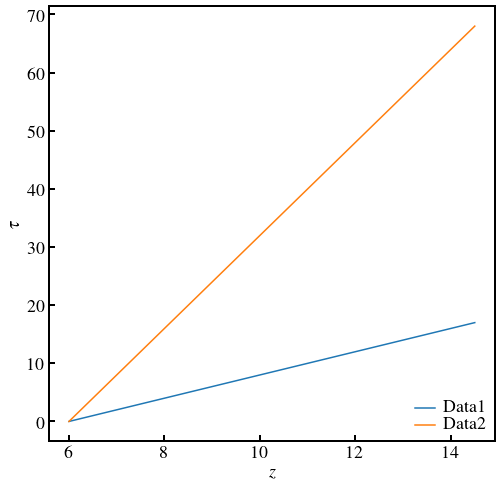

In [8]:
plot_mass_frac(z, mass_frac_allmodels, model_tags)
plot_tau(z, tau_allmodels, model_tags)

Awesome!  We now have two individual Figures that could be presented separately. Now let's combine them into a single Figure...

In [9]:
def plot_combined(z, mass_frac_allmodels, tau_allmodels, model_tags):
    """
    Plots the evolution of mass fraction and tau on a single Figure.

    Parameters
    ----------

    z : List of floats. Length is the number of models.
        The redshift range we're plotting over.
        
    mass_frac_allmodels, tau_frac_allmodels : 2D nested list of floats. Outer length is the number of models,
                                              inner length is ``len(z)``.
        The mass fraction and tau value at each redshift for each model.

    model_tags : List of strings.  Length is the number of models.
        The model entry that will be placed in the legend.

    Returns
    ---------
    
    None. The figure is displayed in the Notebook.
    """

    # Generate a 1 row, 2 column plot.
    fig, ax = plt.subplots(nrows = 1, ncols = 2,
                           sharex=False, sharey=False, figsize=(16, 8))

    # Then pass each axis to its function.
    ax[0] = plot_mass_frac(z, mass_frac_allmodels, model_tags, ax[0])
    ax[1] = plot_tau(z, tau_allmodels, model_tags, ax[1])

    # We'll keep the legend on the mass fraction plot.
    leg = ax[0].legend(loc='lower right', numpoints=1, labelspacing=0.1)
    leg.draw_frame(False)
    for t in leg.get_texts():
        t.set_fontsize(fontsize)

    plt.tight_layout()

    fig.show()

/Users/100921091/miniconda/envs/py3.6/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


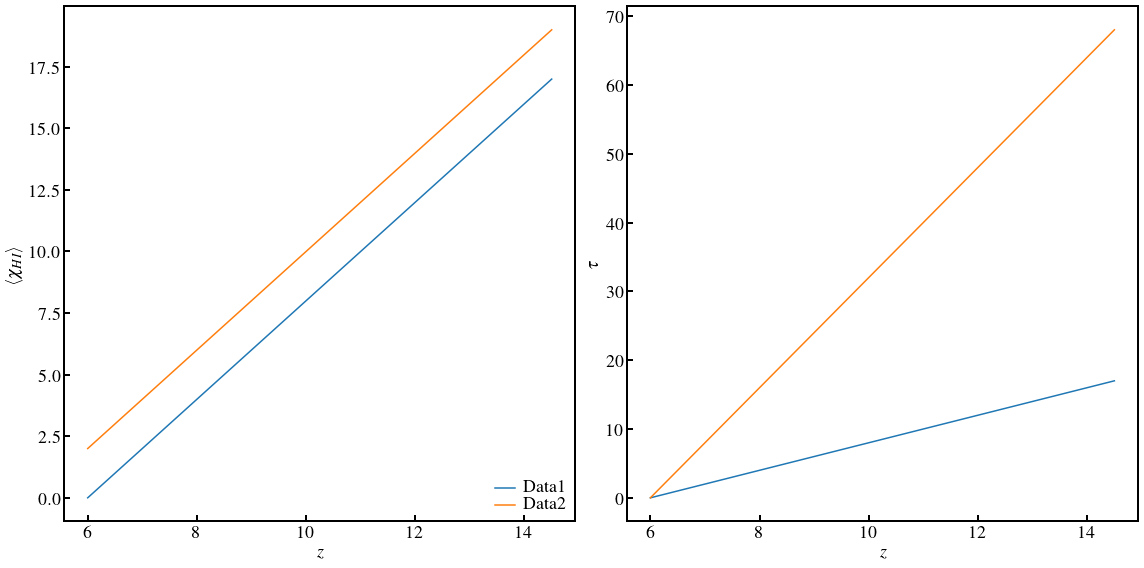

In [10]:
plot_combined(z, mass_frac_allmodels, tau_allmodels, model_tags)